In [21]:
from typing import *
import matplotlib.pyplot as plt
from autoencoder import AutoEncoder
from classifier import Classifier

In [22]:
# Set to True to load existing models instead.
load_existing = False

# Autoencoder

In the following cell we train an auto-encoder to learn better representations of the mnist data. We played around with the latent_size setting to find an optimal value, and concluded that it wasn't worth going below 10 as the encoder started to struggle converging at a lower loss.

loss=0.01734025: 100%|██████████| 2000/2000 [02:36<00:00, 12.78it/s]


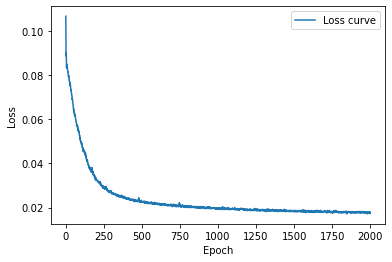

In [23]:
if load_existing:
    auto_encoder = AutoEncoder.load("model.autoencoder")
else:
    auto_encoder = AutoEncoder(
        train_size=0.8,
        device="cpu",
        latent_size=10,
        lr=0.003
    )
    auto_encoder.train(2000, batch=0.05, plot_stats=True)
    auto_encoder.save("model")

Below is comparisons between ground-truths (images from mnist) and the decoder outputs. We struggles finding the reason for the black dots frequently occurring, and we believe this affected the following tuned model's performance.

We earlier discovered that torchvisions library doesn't normalize and rescale images for us to encode it into an image, so we probably has rendering-errors before, but we don't know the problem occurring here.

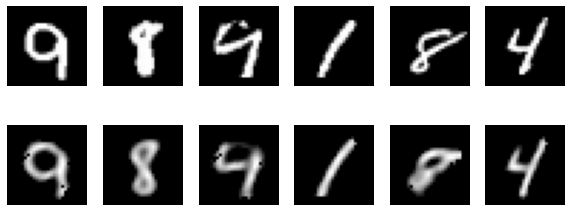

In [24]:
auto_encoder.plot_predictions()

# Pure classifier

Here we train a normal classifier. Note that the hidden layers share the same architecture as the encoder in the auto-encoder. Our models only receives 1% labeled data for training here, and yields adequate results given the small data. This is probably due to simplicity of the mnist dataset.

loss=0.38677406, accuracy=0.8152: 100%|██████████| 700/700 [03:43<00:00,  3.14it/s]


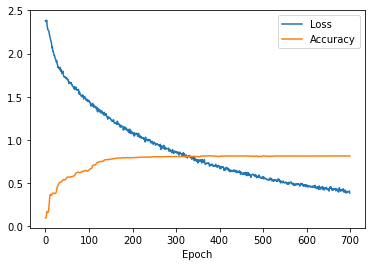

In [40]:
if load_existing:
    classifier = Classifier.load("model.classifier")
else:
    classifier = Classifier(
        train_size=0.01,
        device="cpu",
        latent_size=10,
        lr=0.001
    )
    classifier.train(
        epochs=700, 
        batch=0.4, 
        plot_stats=True, 
        optimize_encoder=True
        )
    classifier.save("model")

prediction=3


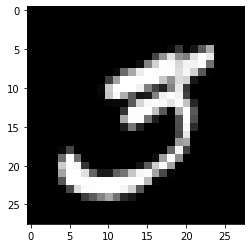

In [26]:
I = 477
sample = classifier.get_image(I)
prediction = classifier.predict(sample)

plt.imshow(sample, cmap="gray", label="dsa")
print(f"{prediction=}")

# Tuned classifier from encoder

Here we create a classifier from the auto-encoder first created. We do not tune the weights of the pre-trained encoder, but only the newly added layer at the output. 

We had to increase the learning rate here to yield any results. This is contrary to what we first believed would be optimal due to the fact that the train-data portion is very small. We think this is due to the small parameter-space that's actually being modified.

loss=0.33478484, accuracy=0.8670: 100%|██████████| 700/700 [00:48<00:00, 14.52it/s]


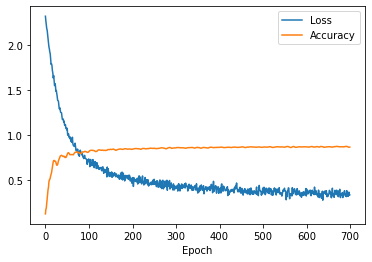

In [39]:
if load_existing:
    tuned_classifier = Classifier.load("pretrained.classifier")
else:
    tuned_classifier = auto_encoder.to_classifier(train_size=0.01, lr=0.05)
    tuned_classifier.train(
        epochs=700,
        batch=.5,
        plot_stats=True,
        optimize_encoder=False
    )
    tuned_classifier.save("pretrained")

prediction=4


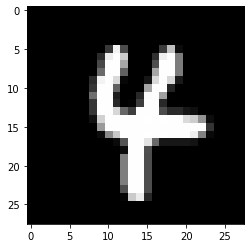

In [28]:
I = 47
sample = tuned_classifier.get_image(I)
prediction = tuned_classifier.predict(sample)

plt.imshow(sample, cmap="gray", label="dsa")
print(f"{prediction=}")